In [144]:
import requests

In [146]:
from collections import defaultdict
import os

import matplotlib.pyplot as plt
import numpy as np

In [147]:
path = "../data//txt/"
files = sorted(os.listdir(path))

In [148]:
len(files)

2820

In [149]:
all_years = [str(year) for year in range(1847, 1979)]

In [150]:
count_decade = defaultdict(int)
count_cities = defaultdict(int)
count_tomes = defaultdict(int)
covered_years = set()

for f in files:
    if "_" in f and f.endswith("txt"):
        elems = f.split("_")
        city = elems[0]
        year = elems[1]
        tome = elems[3]
        covered_years.add(year)
        decade = year[:3] + "0s"
        count_decade[decade] += 3
        count_cities[city] += 3
        count_tomes[tome] += 3
    else:
        print(f"Anomalous file: {f}")

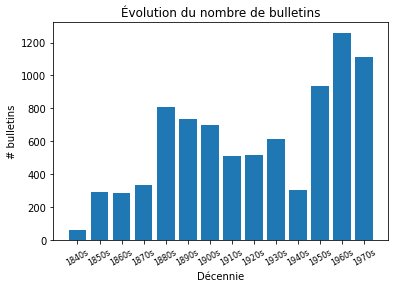

In [151]:
index = np.arange(len(count_decade))
plt.bar(index, count_decade.values())
plt.xlabel('Décennie')
plt.ylabel('# bulletins')
plt.xticks(index, count_decade.keys(), fontsize=8, rotation=30)
plt.title('Évolution du nombre de bulletins')
plt.show()

## FREQUENCE DES MOTS

In [152]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [153]:
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", 
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu""du", "un", "une", "en", "dans", "elle", "ils", "ait", "ainsi", "afin", "alors",
      "assez", "as", "aucun", "aurait", "d'abord", "deux", "dessous", "dessus", "dix", "dont",
      "encore", "est", "est-ce", "eurent", "eut", "faut", "hormis", "hors", "elles", "lesquels",
      "malgré", "moins", "mêmes", "notamment", "on", "parfois", "toutefois", "sommes", "voici",
      "étaient", "vos", "les", "zut", "état", "quand", "tellement", "pas", "grâce", "force"]
sw = set(sw)

In [154]:
print(f"{len(sw)} stopwords:\n {sorted(sw)}")

222 stopwords:
 ['afin', 'ai', 'aie', 'aient', 'aies', 'ainsi', 'ait', 'alors', 'après', 'as', 'assez', 'au', 'aucun', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'autre', 'autres', 'aux', 'avaient', 'avais', 'avait', 'avec', 'avez', 'aviez', 'avions', 'avoir', 'avons', 'ayant', 'ayante', 'ayantes', 'ayants', 'ayez', 'ayons', 'bien', 'c', 'ce', 'cela', 'celle', 'ces', 'cet', 'cette', 'comme', 'contre', 'd', "d'abord", 'dans', 'de', 'depuis', 'des', 'dessous', 'dessus', 'deux', 'dire', 'dit', 'dix', 'doit', 'donc', 'dont', 'du', 'elle', 'elles', 'en', 'encore', 'entre', 'es', 'est', 'est-ce', 'et', 'eu', 'eue', 'eues', 'eurent', 'eus', 'eusse', 'eussent', 'eusses', 'eussiez', 'eussions', 'eut', 'eux', 'eûmes', 'eût', 'eûtes', 'faire', 'fait', 'faut', 'force', 'furent', 'fus', 'fusse', 'fussent', 'fusses', 'fussiez', 'fussions', 'fut', 'fûmes', 'fût', 'fûtes', 'grâce', 'het', 'hormis', 'hors', 'il', 'ils', 'j', 'je'

In [155]:
# Récupération du contenu du fichier
path = "../data/all.txt"
limit = 10**8

with open(path) as f:
    text = f.read()[:limit]

In [156]:

# Tokenization
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

4622909 words found


In [157]:
words[:60]

['V',
 'I',
 'L',
 'L',
 'E',
 'DE',
 'BRUXELLES',
 'bulletin',
 'ires',
 '8éanas',
 'Dl',
 '!',
 'CONSEIL',
 'COMMUNAL',
 'ANNÉE',
 '1847',
 '.',
 'AU',
 'VILLE',
 'DE',
 'B',
 'R',
 'U',
 'X',
 'E',
 'L',
 'L',
 'E',
 'S',
 '.',
 'bulletin',
 'CONSEIL',
 'àes',
 'Séances',
 'COMMUNAL',
 '.',
 'ANNÉE',
 '1847',
 '.',
 'BRUXELLES',
 ',',
 'IMPRIMERIE',
 'D',
 'E',
 'J',
 '.',
 'H',
 '.',
 'B',
 'R',
 'I',
 'A',
 'R',
 'D',
 ',',
 'RITE',
 'N',
 'E',
 'U',
 'V']

In [158]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 10 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

99045 words kept (9295 different word forms)


In [159]:
fdist = nltk.FreqDist(kept)
year = 1874
fdist.most_common(20)

[('administration', 3266),
 ('bourgmestre', 2753),
 ('proposition', 2015),
 ('établissement', 1347),
 ('construction', 1313),
 ('gouvernement', 1236),
 ('approbation', 1065),
 ('conclusions', 991),
 ('autorisation', 921),
 ('propriétaires', 754),
 ('centimètres', 748),
 ('communication', 702),
 ('augmentation', 689),
 ('dispositions', 637),
 ('disposition', 631),
 ('distribution', 580),
 ('bienfaisance', 547),
 ('constructions', 535),
 ('instruction', 524),
 ('introduction', 516)]

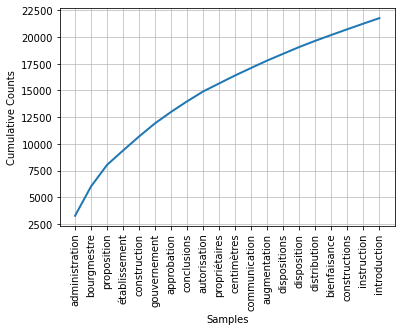

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [160]:
 #Plot: les n mots les plus fréquents
n = 20
fdist.plot(n, cumulative=True)

##### mots qui apparaissent une seule fois

In [161]:

fdist.hapaxes()[:50]

['administrera',
 'philanlropique',
 'colégataires',
 'incomberont',
 'inaliénables',
 'craenenbroeck',
 'lichtendael',
 'propriétéestaujourd',
 'dispensatrice',
 'philantropique',
 'retomberaient',
 'surveillerait',
 'reinboursement',
 'autorisantl',
 'trèsfacilement',
 'ireespèceetdépen',
 'rndminislralion',
 'trèsîrrégulière',
 'pétitionnait',
 'dégoûtantes',
 'vasderlinden',
 'méconnaîtra',
 'ouvriraient',
 'importateurs',
 'émigrations',
 'proposilton',
 'insolvables',
 'vanderschilde',
 'correspondances',
 'mnnicipales',
 'encapuchonné',
 'intelligens',
 'divertissemens',
 'prononcerais',
 'parfahçmenl',
 'dyneombrement',
 'éiablissement',
 'vraisemblance',
 'grandesmessageries',
 'emplaceniens',
 'restauréetagrandi',
 'conslruction',
 'épijjrammes',
 'attachaient',
 'substantielles',
 'demijournée',
 'connaisance',
 'verbalisent',
 'obtempéreraient',
 'transmettra']

#### mots les plus longs du corpus

In [162]:
n = 40
sorted(voc, key=len, reverse=True)[:n]

['legouvernementferailluminerleboulevardctlejardinbotanique',
 'distributiondediverssecoursparlescomités',
 'marchandisesdésagréablesarriventqueîque',
 'quenouscodservonsdanslescirconstances',
 'lesreprisesenargentduservicearriérés',
 'necommuniqueaveclerestedebruxcllcs',
 'plusfavorablessnrcetétablissement',
 'uiseillerdcsrainesjjlntroduction',
 'jjaijïfiirailfeiiséaiisietled',
 'sulïisamnwnûéfcwliaiiamuloedc',
 'puisajanooiraâailbqabfljimmoo',
 'iniligéesdclamanièresuivante',
 'insaîubresjqhgissgfttwflbyab',
 'ailtfeaîditedôdliiigdanoijbp',
 'feeidestijidigeiitèjibimïhf',
 'commissionnairesexpéditeurs',
 'pliesetautrcspoissonssalés',
 'quelsfondscettedépcnsesera',
 'introduitesdansnotrebudget',
 'lechevalierwynsderaucourt',
 'laigttuatiônjfinaiicière',
 'admistrationsmunicipales',
 'decelledelabienfaisiance',
 'cequidoitembarrasserpour',
 'eimetièrequiaétéconcédéà',
 'haafcibrféeéfunjtfiombre',
 'placedcvantleportaildes',
 'fibvkjmttaiiméjfâïïtoïs',
 'dépensesextraordinaires',
 'plai

### EXTRACTION DE MOTS CLES

In [163]:
import os
import yake

In [164]:
ignored = set(["conseil communal", "conseil général", "commune", "Bourgmestre", "conseil"])
ignored

{'Bourgmestre', 'commune', 'conseil', 'conseil communal', 'conseil général'}

In [165]:
kw_extractor = yake.KeywordExtractor(lan="fr", top=100)
kw_extractor

In [166]:
data_path = "../data/txt/"
files = os.listdir(data_path)

In [167]:
len(files)

2820

In [168]:
files[:260]

['Bxl_1847_Tome_I1_Part_1.txt',
 'Bxl_1847_Tome_I1_Part_2.txt',
 'Bxl_1847_Tome_I1_Part_3.txt',
 'Bxl_1847_Tome_I1_Part_4.txt',
 'Bxl_1847_Tome_I1_Part_5.txt',
 'Bxl_1848_Tome_I1_Part_1.txt',
 'Bxl_1848_Tome_I1_Part_2.txt',
 'Bxl_1848_Tome_I1_Part_3.txt',
 'Bxl_1849_Tome_I1_Part_1.txt',
 'Bxl_1849_Tome_I1_Part_2.txt',
 'Bxl_1849_Tome_I1_Part_3.txt',
 'Bxl_1849_Tome_I1_Part_4.txt',
 'Bxl_1849_Tome_I1_Part_5.txt',
 'Bxl_1849_Tome_II1_Part_1.txt',
 'Bxl_1849_Tome_II1_Part_2.txt',
 'Bxl_1849_Tome_II1_Part_3.txt',
 'Bxl_1849_Tome_II1_Part_4.txt',
 'Bxl_1849_Tome_II1_Part_5.txt',
 'Bxl_1849_Tome_II1_Part_6.txt',
 'Bxl_1849_Tome_II1_Part_7.txt',
 'Bxl_1850_Tome_I1_Part_1.txt',
 'Bxl_1850_Tome_I1_Part_2.txt',
 'Bxl_1850_Tome_I1_Part_3.txt',
 'Bxl_1850_Tome_I1_Part_4.txt',
 'Bxl_1850_Tome_II1_Part_1.txt',
 'Bxl_1850_Tome_II1_Part_2.txt',
 'Bxl_1850_Tome_II1_Part_3.txt',
 'Bxl_1850_Tome_II1_Part_4.txt',
 'Bxl_1850_Tome_II1_Part_5.txt',
 'Bxl_1850_Tome_II1_Part_6.txt',
 'Bxl_1850_Tome_II1_Part_7.

In [169]:
lkn_files = [f for f in files if f.startswith('Lkn_')]
len(lkn_files)

151

In [170]:
this_file = lkn_files[2]
this_file

'Lkn_1874_Tome_RptAn_Part_2.txt'

In [171]:
text = open(os.path.join(data_path, this_file), 'r').read()

In [172]:
keywords = kw_extractor.extract_keywords(text)

In [173]:
keywords

[('Van Den Kerckhove', 2.2876783549754945e-05),
 ("l'Echevin Bockstael", 0.00011976717582973957),
 ('Den Kerckhove', 0.00016234010574612824),
 ('Van Den', 0.00023527450741464535),
 ('Bockstael', 0.0002678153214312144),
 ('Conseil communal', 0.0003411639847087767),
 ('BOURGMESTRE', 0.00040617786528958805),
 ('Conseil', 0.00043468579107701713),
 ('compte', 0.0007384912657061487),
 ('Kerckhove', 0.0007521678856211881),
 ('compte communal', 0.0009589260278750959),
 ('rue', 0.0009875511463048002),
 ('Collège', 0.001043183911588679),
 ('Lestgarens', 0.00141192690255934),
 ('Section', 0.001433279911758102),
 ('budget', 0.001436572147704208),
 ('Van', 0.0014597578438176482),
 ('taxe', 0.001497271946047706),
 ('commune', 0.001554410940003781),
 ('Sections', 0.0015876331330243593),
 ("c'est", 0.0015903785074395569),
 ('Den', 0.0016761452299823747),
 ("l'Echevin", 0.001816609360726627),
 ('communal', 0.0019696990978586826),
 ('société', 0.0022235188418483092),
 ('francs', 0.002385857670267249),
 

#### NUAGE DE MOTS

In [174]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [175]:
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", 
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu""du", "un", "une", "en", "dans", "elle", "ils", "ait", "ainsi", "afin", "alors",
      "assez", "as", "aucun", "aurait", "d'abord", "deux", "dessous", "dessus", "dix", "dont",
      "encore", "est", "est-ce", "eurent", "eut", "faut", "hormis", "hors", "elles", "lesquels",
      "malgré", "moins", "mêmes", "notamment", "on", "parfois", "toutefois", "sommes", "voici",
      "étaient", "vos", "les", "zut", "état", "quand", "tellement", "pas", "grâce", "force"]
sw = set(sw)


In [176]:

print(f"{len(sw)} stopwords:\n {sorted(sw)}")

224 stopwords:
 ['afin', 'ai', 'aie', 'aient', 'aies', 'ainsi', 'ait', 'alors', 'après', 'as', 'assez', 'au', 'aucun', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'autre', 'autres', 'aux', 'avaient', 'avais', 'avait', 'avec', 'avez', 'aviez', 'avions', 'avoir', 'avons', 'ayant', 'ayante', 'ayantes', 'ayants', 'ayez', 'ayons', 'bien', 'c', 'ce', 'cela', 'celle', 'ces', 'cet', 'cette', 'comme', 'contre', 'd', "d'abord", 'dans', 'de', 'depuis', 'des', 'dessous', 'dessus', 'deux', 'dire', 'dit', 'dix', 'doit', 'donc', 'dont', 'du', 'elle', 'elles', 'en', 'encore', 'entre', 'es', 'est', 'est-ce', 'et', 'eu', 'eue', 'eues', 'eurent', 'eus', 'eusse', 'eussent', 'eusses', 'eussiez', 'eussions', 'eut', 'eux', 'eûmes', 'eût', 'eûtes', 'faire', 'fait', 'faut', 'force', 'furent', 'fus', 'fusse', 'fussent', 'fusses', 'fussiez', 'fussions', 'fut', 'fûmes', 'fût', 'fûtes', 'grâce', 'het', 'hormis', 'hors', 'il', 'ils', 'j', 'je'

In [177]:
year = 1874

In [178]:
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
txts

['Bxl_1874_Tome_I1_Part_1.txt',
 'Bxl_1874_Tome_I1_Part_2.txt',
 'Bxl_1874_Tome_I1_Part_3.txt',
 'Bxl_1874_Tome_I1_Part_4.txt',
 'Bxl_1874_Tome_I1_Part_5.txt',
 'Lkn_1874_Tome_RptAn_Part_1.txt',
 'Lkn_1874_Tome_RptAn_Part_10.txt',
 'Lkn_1874_Tome_RptAn_Part_2.txt',
 'Lkn_1874_Tome_RptAn_Part_3.txt',
 'Lkn_1874_Tome_RptAn_Part_4.txt',
 'Lkn_1874_Tome_RptAn_Part_5.txt',
 'Lkn_1874_Tome_RptAn_Part_6.txt',
 'Lkn_1874_Tome_RptAn_Part_7.txt',
 'Lkn_1874_Tome_RptAn_Part_8.txt',
 'Lkn_1874_Tome_RptAn_Part_9.txt']

In [179]:
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [180]:
len(content_list)

15

In [181]:
content_list[0][:1000]

"VILLE DE\n\nB U L L E T I N\n\nANNÉE\n\nPREMIER\n\nBRUXELLES.\n\nC O M M U N A L\n\n1874.\n\nSEMESTRE.\n\nBRUXELLES,\nIMPRIMERIE BOL S-WITT O ü CK.\n\n\x0ch\n\nle\n\n\x0cVILLE\n\nDE\n\nB R U X E L L E S .\n\nANNÉE\n\n1874.\n\nLUNDI 19 JANVIER.\n\nNUMÉRO 1.\n\nVente d'un bâtiment à charge de démolition.\n\nLe mardi 13 janvier 1874, à une heure précise, il sera procédé,\ndans l'une des salles d<; l'Hôtel de Ville, à l'adjudication, au plus\noffrant et sur mise à prix, des matériaux à provenir de la démolition d'une maison avec magasins et ateliers, sise rue des\nTanneurs, 35.\nLe cahier des charges est déposé à l'Hôtel de Ville, dans\nles bureaux de la troisième division (service de M. l'architecte\nJamaer), où l'on peut en prendre connaissance les jours non\nfériés, de dix à quatre heures.\nBruxelles, le 30 décembre 1873.\nPar le Collège :\n\nLe Collège,\n\nLe Secrétaire,\n\nJ . ANSPACH.\n\nA. LACOMBLÉ.\n\nMilice.\n\nLe Collège des Bourgmestre et Echevins de la ville de Bruxelles\nA l'

In [182]:
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [183]:
with open(os.path.join(temp_path, f'{year}.txt'), 'r') as f:
    before = f.read()

before[:1000]

"VILLE DE\n\nB U L L E T I N\n\nANNÉE\n\nPREMIER\n\nBRUXELLES.\n\nC O M M U N A L\n\n1874.\n\nSEMESTRE.\n\nBRUXELLES,\nIMPRIMERIE BOL S-WITT O ü CK.\n\n\x0ch\n\nle\n\n\x0cVILLE\n\nDE\n\nB R U X E L L E S .\n\nANNÉE\n\n1874.\n\nLUNDI 19 JANVIER.\n\nNUMÉRO 1.\n\nVente d'un bâtiment à charge de démolition.\n\nLe mardi 13 janvier 1874, à une heure précise, il sera procédé,\ndans l'une des salles d<; l'Hôtel de Ville, à l'adjudication, au plus\noffrant et sur mise à prix, des matériaux à provenir de la démolition d'une maison avec magasins et ateliers, sise rue des\nTanneurs, 35.\nLe cahier des charges est déposé à l'Hôtel de Ville, dans\nles bureaux de la troisième division (service de M. l'architecte\nJamaer), où l'on peut en prendre connaissance les jours non\nfériés, de dix à quatre heures.\nBruxelles, le 30 décembre 1873.\nPar le Collège :\n\nLe Collège,\n\nLe Secrétaire,\n\nJ . ANSPACH.\n\nA. LACOMBLÉ.\n\nMilice.\n\nLe Collège des Bourgmestre et Echevins de la ville de Bruxelles\nA l'

In [184]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [185]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1874_clean.txt!'

In [186]:
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r') as f:
    after = f.read()

after[:1000]

'année premier bruxelles semestre bruxelles imprimerie bol witt année lundi janvier numéro vente bâtiment charge démolition mardi janvier heure précise procédé salles hôtel adjudication offrant mise prix matériaux provenir démolition maison magasins ateliers sise rue tanneurs cahier charges déposé hôtel bureaux troisième division service architecte jamaer prendre connaissance jours fériés quatre heures bruxelles décembre collège collège secrétaire anspach lacomblé milice collège bourgmestre echevins bruxelles honneur porter connaissance public liste inscription miliciens doivent concourir tirage sort déposée bureau milice petite rue longschariots intéressés pourront prendre connaissance janvier heures matin heures relevée réclamations chef inscriptions indues omissions devront adressées bourgmestre avant mois bruxelles décembre collège secrétaire collège anspach emprunt millions francs tirage sort liste officielle obligations remboursables mars remboursable remboursable remboursables c

In [187]:
frequencies = Counter(after.split())
print(frequencies.most_common(30))

[('conseil', 1818), ('bourgmestre', 1582), ('rue', 1461), ('collège', 1304), ('compte', 1299), ('communal', 1235), ('bockstael', 1229), ('francs', 1183), ('commune', 1044), ('travaux', 934), ('messieurs', 908), ('echevin', 810), ('art', 788), ('bruxelles', 770), ('somme', 768), ('rapport', 734), ('kerckhove', 725), ('question', 696), ('lieu', 660), ('séance', 658), ('administration', 657), ('terrain', 647), ('section', 639), ('budget', 632), ('communale', 616), ('demande', 574), ('société', 568), ('recettes', 557), ('échevin', 533), ('taxe', 510)]


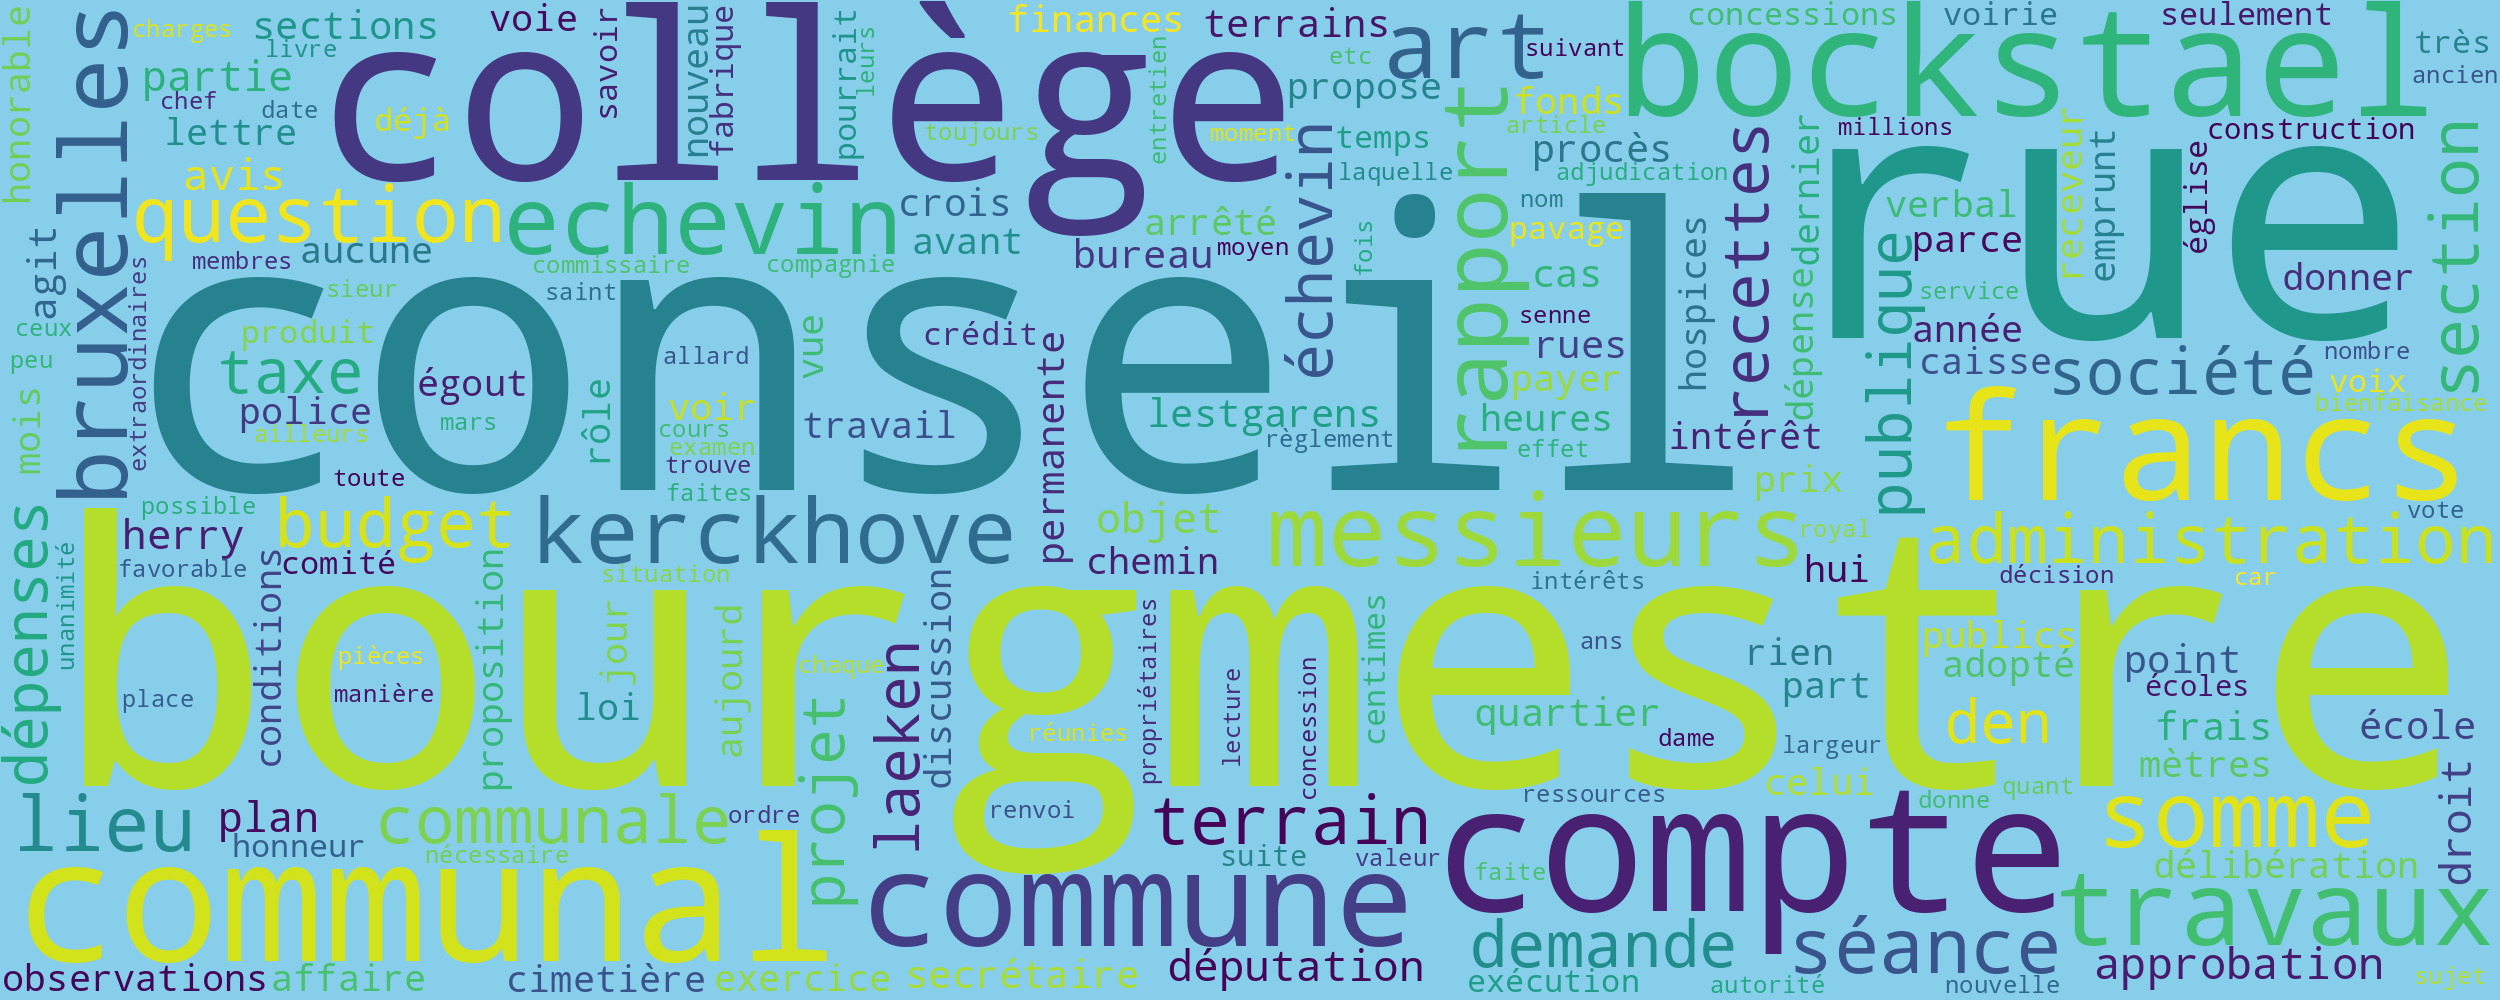

In [188]:
cloud = WordCloud(width=2500, height=1000, background_color='skyblue').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

#### Reconnaissance d'entités nommées avec SpaCy

In [189]:
from collections import defaultdict
import sys
import spacy
from spacy.lang.fr.examples import sentences

In [195]:
nlp = spacy.load('fr_core_news_md')

In [198]:
n=700000
text = open("../data/all.txt", encoding='utf-8').read()[:n]

In [199]:
%%time
# Traiter le texte

doc = nlp(text)

CPU times: user 48.6 s, sys: 2.86 s, total: 51.5 s
Wall time: 51.5 s


In [207]:
things = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "PER" and len(ent.text) > 3:
        things[ent.text] += 2

In [210]:
sorted_people = sorted(people.items(), key=lambda kv: kv[1], reverse=True)

for person, freq in sorted_people[:30]:
    print(f"{person} apparait {freq} fois dans le corpus")

q u i apparait 174 fois dans le corpus
Bortier apparait 142 fois dans le corpus
Gendebien apparait 120 fois dans le corpus
Bourgmestre apparait 86 fois dans le corpus
Doucet apparait 76 fois dans le corpus
Doncker apparait 54 fois dans le corpus
Vanderlinden apparait 54 fois dans le corpus
Anspach apparait 52 fois dans le corpus
M. Bortier apparait 50 fois dans le corpus
Messieurs apparait 50 fois dans le corpus
Cans apparait 40 fois dans le corpus
Fontainas apparait 38 fois dans le corpus
Page apparait 34 fois dans le corpus
Cluysenaar apparait 30 fois dans le corpus
q u ' i apparait 30 fois dans le corpus
j o u r apparait 28 fois dans le corpus
Schumacher apparait 24 fois dans le corpus
échevin Orts apparait 24 fois dans le corpus
M. Cluysenaar apparait 20 fois dans le corpus
Bartels apparait 18 fois dans le corpus
M. Blaes apparait 16 fois dans le corpus
M. de Doncker apparait 16 fois dans le corpus
Verhulst apparait 14 fois dans le corpus
é t a i apparait 14 fois dans le corpus
M. 

#### ANALYSE DE SENTIMENTS DE 20 PHRASES COMPORTANTS LE MOT TAXE

In [211]:
import sys
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

In [212]:
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

def get_sentiment(input_text):
    blob = tb(input_text)
    polarity, subjectivity = blob.sentiment
    polarity_perc = f"{100*abs(polarity):.0f}"
    subjectivity_perc = f"{100*subjectivity:.0f}"
    if polarity > 0:
        polarity_str = f"{polarity_perc}% positive"
    elif polarity < 0:
        polarity_str = f"{polarity_perc}% negative"
    else:
        polarity_str = "neutral"
    if subjectivity > 0:
        subjectivity_str = f"{subjectivity}% subjective"
    else:
        subjectivity_str = "perfectly objective"
    print(f"This text is {polarity_str} and {subjectivity_str}.")

In [213]:
get_sentiment("M. CLAUDE . Messieurs, il y a quelques temps, j'ai signalé au Collège le mauvais état des plaques indiquant les noms des rues.")

This text is 48% negative and 0.15000000000000002% subjective.


In [214]:
get_sentiment("Si la Compagnie donne suite à ce projet, nous aurons alors une excellente occasion de régler définitivement la question du tarif des prix de parcours.")

This text is 30% positive and 0.75% subjective.


In [215]:
get_sentiment("En deux mots, il fut décidé qu'on renoncerait à la taxe par voi ture, qu'on n'admettrait pas le droit de stationnement proposé par M. Vaucamps.")

This text is 14% positive and 0.25% subjective.


In [216]:
get_sentiment(" Monsieur, Nous avons l'honneur de répondr e à votre lettre du 8 courant.")

This text is 10% positive and 0.2% subjective.


In [217]:
get_sentiment("M . VA N DE N KERCKHOVE. J'ai aussi le droit de ne pas faire de propositions.")

This text is 17% positive and perfectly objective.


In [218]:
get_sentiment("M . Ris n'a pas cru non plus pouvoir accepter les chiffres portés par son prédécesseur à l'art. 10 pour » location des appartements du bâtiment servant de bureau de police, chaussée d'Anvers *, par la raison que ce dernier est en désaccord, sur la somme remise, avec la peisonne qu'il chargeait de cette per ception; le sieur Ris n'a pas à intervenir dans ces contestations.")

This text is 6% negative and 0.2375% subjective.


In [219]:
get_sentiment("Il serait difficile d'appliquer la taxe telle qu'elle l'était autrefois.")

This text is 50% negative and 0.4% subjective.


In [220]:
get_sentiment("La demande du Collège tendant à être autorisé à ester en justice contre les sieurs Stroot, H. , et Verellen, qui refusent d'acquit ter la taxe sur le pavage.")

This text is 5% positive and 0.2% subjective.


In [221]:
get_sentiment("Mais il ne s'agit aujourd'hui que de la classilication des rues pour l'applica tion de la taxe sur les bâtisses.")

This text is neutral and perfectly objective.


In [222]:
get_sentiment("Un membre demande que l'on examine, à l'occasion du prochain budget, la question de savoir si, pour compenser la différence qui sans doute existera entre les centimes additionnels des habitants de la partie urbaine et de ceux de la partie rurale de la commune, i l ne conviendrait pas de créer une taxe spé ciale sur les chevaux, dans des proportions analogues à celles qui existent actuellement.")

This text is 5% positive and 0.15999999999999998% subjective.


In [223]:
get_sentiment("Cette taxe est évidemment insuffisante, vu l'augmentation des matériaux et de la main-d'œuvr e depuis quatre ans qu'elle a été établie, et nous devons vous proposer, Messieurs, de la majorer comme suit.")

This text is 20% positive and 0.4% subjective.


In [224]:
get_sentiment("Cette taxe ne peut plus couvrir les dépenses auxquelles la commune est astreinte par l'établissement des égouts publics, leur entretien et leur surveillance.")

This text is 8% positive and 0.06666666666666667% subjective.


In [225]:
get_sentiment("Suppression de la taxe personnelle et de la taxe sur les débits de boissons alcooliques.")

This text is 5% positive and 0.1% subjective.


In [226]:
get_sentiment("Il est vraiment miraculeux que des malheurs ne soient pas arrivés au pont ; aussi les protestations et les récriminations du public faisaient bien voir son mécontentement; et pour peu que cet état de choses dure encore, le public finira par abandonner entièrement la Commune de Laeken, pour se rendre où i l trouvera plus de sécurité.")

This text is 4% positive and 0.2222222222222222% subjective.


In [227]:
get_sentiment("V'Étoile belge, du même jour, ajoute que les hommes qui se sont jetés à l'eau pour sauver ces malheureux jeunes gens, avaient en sortant de l'eau « de a la boue jusqu'au cou. «")

This text is 1% positive and 0.4% subjective.


In [228]:
get_sentiment("Ce ne sera que lorsque toutes ces précautions seront prises et rigoureusement observées que nous pourrons voir diminuer les accidents qui se produisent malheureusement si souvent dans le canal qui traverse notre territoire.")

This text is 16% positive and 0.35% subjective.


In [234]:
get_sentiment("M. Weber. Il me semble qu'on pourrait ajouter que la Ville n'a jamais eu le moindre contrat avec M. Suys, et que, par conséquent, celui-ci n'a jamais pu manquer à ses obligations envers la Ville. ")

This text is 10% negative and 0.15% subjective.


In [230]:
get_sentiment("Comme ils sont disséminés, même hors de la commune, la surveillance en est difficile et les mutations nombreuses")

This text is 14% negative and 0.3333333333333333% subjective.


In [232]:
get_sentiment(" La taxe n'a pas encore été adoptée en Section des finances. ")

This text is neutral and perfectly objective.


In [233]:
get_sentiment("Cette taxe ne sera applicable que dans le cas où le propriétaire ne voudrait pas s'entendre avec la commune pour les travaux d'utilité publique. ")

This text is 4% positive and 0.05% subjective.


### Word Embeddings : le modèle Word2Vec

#### exploration d'un modèle

In [236]:
import sys

from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec

import nltk
from nltk.tokenize import wordpunct_tokenize
from unidecode import unidecode

In [237]:
model = Word2Vec.load("../data/bulletins.model")

#### Chercher les mots les plus proches du terme "taxe"

In [242]:
model.wv.most_similar("taxe", topn=30)

[('base', 0.8864657282829285),
 ('reduction', 0.8040028810501099),
 ('reserve', 0.7877477407455444),
 ('colonne', 0.7869418263435364),
 ('mesure', 0.7737370729446411),
 ('suppression', 0.7703023552894592),
 ('legislature', 0.7609761357307434),
 ('constitution', 0.7591462135314941),
 ('matiere', 0.7572412490844727),
 ('premiere_fois', 0.7556735873222351),
 ('responsabilite', 0.7536165118217468),
 ('limite', 0.7514782547950745),
 ('perte', 0.7456198334693909),
 ('petition', 0.7447428703308105),
 ('realisation', 0.7441925406455994),
 ('portee', 0.7348005175590515),
 ('verite', 0.7315400242805481),
 ('combinaison', 0.7310647368431091),
 ('reunion', 0.7210015654563904),
 ('pose', 0.7207593321800232),
 ('solution', 0.718313992023468),
 ('condition', 0.7161832451820374),
 ('depense', 0.7155935764312744),
 ('difficulte', 0.7151387929916382),
 ('difference', 0.7151374220848083),
 ('preuve', 0.7137593030929565),
 ('pensee', 0.7136402726173401),
 ('redaction', 0.7112257480621338),
 ('marchandise'

In [241]:
print(model.wv.most_similar(positive=['commune', 'taxe'], negative=['bruxelles']))

[('base', 0.782530665397644), ('reduction', 0.7646288871765137), ('realisation', 0.7638735175132751), ('constitution', 0.758582592010498), ('matiere', 0.752945601940155), ('suppression', 0.7479353547096252), ('necessite', 0.7429100275039673), ('destination', 0.7407728433609009), ('responsabilite', 0.7398767471313477), ('faculte', 0.7326933145523071)]


### Clustering de documents

In [243]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [244]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [245]:
data_path = "../data/txt/"

In [246]:
DECADE = '1870'

In [247]:
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [254]:
files[:46]

['Bxl_1870_Tome_I1_Part_1.txt',
 'Bxl_1870_Tome_I1_Part_2.txt',
 'Bxl_1870_Tome_I1_Part_3.txt',
 'Bxl_1870_Tome_I1_Part_4.txt',
 'Bxl_1870_Tome_I1_Part_5.txt',
 'Bxl_1870_Tome_I1_Part_6.txt',
 'Bxl_1870_Tome_II1_Part_1.txt',
 'Bxl_1870_Tome_II1_Part_2.txt',
 'Bxl_1870_Tome_II1_Part_3.txt',
 'Bxl_1870_Tome_II1_Part_4.txt',
 'Bxl_1870_Tome_II1_Part_5.txt',
 'Bxl_1870_Tome_II1_Part_6.txt',
 'Bxl_1870_Tome_II1_Part_7.txt',
 'Bxl_1871_Tome_I1_Part_1.txt',
 'Bxl_1871_Tome_I1_Part_2.txt',
 'Bxl_1871_Tome_I1_Part_3.txt',
 'Bxl_1871_Tome_I1_Part_4.txt',
 'Bxl_1871_Tome_I1_Part_5.txt',
 'Bxl_1871_Tome_II1_Part_1.txt',
 'Bxl_1871_Tome_II1_Part_2.txt',
 'Bxl_1871_Tome_II1_Part_3.txt',
 'Bxl_1871_Tome_II1_Part_4.txt',
 'Bxl_1871_Tome_II1_Part_5.txt',
 'Bxl_1871_Tome_II1_Part_6.txt',
 'Bxl_1871_Tome_II1_Part_7.txt',
 'Bxl_1871_Tome_II1_Part_8.txt',
 'Bxl_1872_Tome_I1_Part_1.txt',
 'Bxl_1872_Tome_I1_Part_2.txt',
 'Bxl_1872_Tome_I1_Part_3.txt',
 'Bxl_1872_Tome_I1_Part_4.txt',
 'Bxl_1872_Tome_II1_Part_

In [255]:
texts = [open(data_path + f).read() for f in files]

In [256]:
texts[0][:500]

'VILLE\n\nDE\n\nBRUXELLES.\n\nBULLETIN COMMUNAL.\nA N N É E\n\nP R E M I E R\n\n1870.\n\nS E M E S T R E .\n\nBRUXELLES,\nIMPRIMERIE\n\nBOLS-WITTOUCK.\n\n\x0cï\n\nSo\ni\n»\n\n1\n\nV\n\nFu\n\nte\n\nG)\n\ni\n\nÛ\n\n\x0cVILLE DE BRUXELLES.\n\nBULLETIN\n\nCOMMUNAL.\n\nA N N É E 1870.\n\nNUMÉRO 1 .\n\nSAMEDI 1\n\ner\n\nCONSEIL\n\ner\n\nJANVIER.\n\nCOMMUNAL.\n\nSéance du 1 janvier 1870.\ner\n\nPrésidence de M. JULES ANSPACH, Bourgmestre.\n\n— Prestation de serment et installation de MM. les Echevins nommés par arrêté royal du 1 décembre 1869, et de M M . les Conseillers élu'

In [263]:
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

In [264]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

In [265]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

In [266]:
%time tfidf_vectors = vectorizer.fit_transform(texts)

CPU times: user 40.1 s, sys: 48.9 ms, total: 40.1 s
Wall time: 40.1 s


In [267]:
tfidf_vectors

<111x8170 sparse matrix of type '<class 'numpy.float64'>'
	with 199143 stored elements in Compressed Sparse Row format>

In [268]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

bochart         0.371732
pavés           0.176135
statue          0.163264
anglaise        0.157298
jottrand        0.150558
                  ...   
du+projet       0.000000
du+pont         0.000000
du+plan         0.000000
du+personnel    0.000000
•+              0.000000
Length: 8170, dtype: float64

In [269]:
tfidf_array = tfidf_vectors.toarray()

### Appliquation d'un algorithme de clustering sur les vecteurs TF-IDF des documents

In [270]:
N_CLUSTERS = 10

In [271]:
km_model = KMeans(n_clusters=N_CLUSTERS)

In [272]:
clusters = km_model.fit_predict(tfidf_vectors)

In [273]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [274]:
pprint(dict(clustering))

{0: ['Lkn_1874_Tome_RptAn_Part_1.txt',
     'Lkn_1874_Tome_RptAn_Part_2.txt',
     'Lkn_1874_Tome_RptAn_Part_3.txt',
     'Lkn_1874_Tome_RptAn_Part_4.txt',
     'Lkn_1874_Tome_RptAn_Part_5.txt',
     'Lkn_1874_Tome_RptAn_Part_6.txt',
     'Lkn_1874_Tome_RptAn_Part_7.txt',
     'Lkn_1874_Tome_RptAn_Part_8.txt',
     'Lkn_1874_Tome_RptAn_Part_9.txt'],
 1: ['Bxl_1870_Tome_I1_Part_1.txt',
     'Bxl_1870_Tome_I1_Part_2.txt',
     'Bxl_1870_Tome_I1_Part_3.txt',
     'Bxl_1870_Tome_I1_Part_4.txt',
     'Bxl_1870_Tome_I1_Part_5.txt',
     'Bxl_1870_Tome_II1_Part_1.txt',
     'Bxl_1870_Tome_II1_Part_3.txt',
     'Bxl_1870_Tome_II1_Part_4.txt',
     'Bxl_1870_Tome_II1_Part_5.txt',
     'Bxl_1870_Tome_II1_Part_6.txt',
     'Bxl_1871_Tome_I1_Part_1.txt',
     'Bxl_1871_Tome_I1_Part_2.txt',
     'Bxl_1871_Tome_I1_Part_3.txt',
     'Bxl_1871_Tome_I1_Part_4.txt',
     'Bxl_1871_Tome_I1_Part_5.txt',
     'Bxl_1871_Tome_II1_Part_1.txt',
     'Bxl_1871_Tome_II1_Part_4.txt',
     'Bxl_1871_Tome_II1_Part_

In [275]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [276]:
reduced_vectors[:20]

array([[ 0.40778363,  0.01336861],
       [ 0.39959365,  0.03171295],
       [ 0.51620251,  0.02827407],
       [ 0.41517325,  0.00502963],
       [ 0.52505179,  0.05228759],
       [ 0.24586417,  0.057708  ],
       [ 0.49038452,  0.02581144],
       [-0.02761497, -0.11407259],
       [ 0.28124873, -0.02413876],
       [ 0.56328855,  0.04190427],
       [ 0.54737041,  0.04790897],
       [ 0.19946249,  0.00259627],
       [ 0.33465399,  0.08661944],
       [ 0.35874297,  0.00592776],
       [ 0.43089134,  0.02623369],
       [ 0.33091752,  0.00117114],
       [ 0.52161918,  0.03275379],
       [ 0.54122106,  0.08375999],
       [ 0.28010264, -0.02078198],
       [ 0.03675885, -0.09809114]])

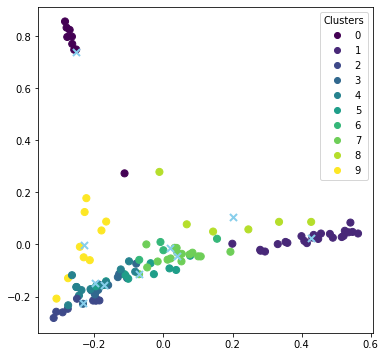

In [322]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(6,6))
scatter = plt.scatter(x_axis, y_axis, s=50, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=50, linewidths = 2, color='skyblue')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")

### La détection de langue

In [297]:
import os
from collections import defaultdict

import langid
import pycountry

In [298]:
langid.set_languages(['fr', 'nl', 'en', 'de'])

In [302]:
root = "../data/txt/"
txts = os.listdir(root)
print(f"{len(txts)} TXT files found")

2820 TXT files found


In [303]:
decade= 1870
limit = 1000

In [304]:
lang_dict = defaultdict(int)
txts = txts[:limit] if limit else texts

In [306]:
for i, txt in enumerate(sorted(txts)):
    if txt.endswith("txt"):
        if i % 50 == 0:
            print(f'{i} document(s) processed...')
        text = open(os.path.join(root, txt)).read()
        text_length = len(text)
        if text_length > 20:
            lang, conf = langid.classify(text)
            lang_dict[lang] += 1
        else:
            print(f"{txt} contains only {text_length} characters, treating as unknown")
            lang_dict['n/a'] += 1
print("Done")

0 document(s) processed...
50 document(s) processed...
100 document(s) processed...
150 document(s) processed...
200 document(s) processed...
Bxl_1869_Tome_I1_Part_4.txt contains only 4 characters, treating as unknown
250 document(s) processed...
300 document(s) processed...
350 document(s) processed...
400 document(s) processed...
450 document(s) processed...
500 document(s) processed...
550 document(s) processed...
600 document(s) processed...
650 document(s) processed...
700 document(s) processed...
750 document(s) processed...
Bxl_1903_Tome_I2_2_Part_12.txt contains only 19 characters, treating as unknown
800 document(s) processed...
850 document(s) processed...
900 document(s) processed...
950 document(s) processed...
Done


In [307]:
for lang_code, nb_docs in lang_dict.items():
    language = pycountry.languages.get(alpha_2=lang_code)
    try:
        lang_name = language.name
    except AttributeError:
        lang_name = language
    print(f"{lang_name}\t{nb_docs}")

French	998
None	2
